In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from scikeras.wrappers  import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\pauls\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\pauls\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\pauls\AppData\Local\Temp/ipykernel_29548/2173245073.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('acs2017_census_tract_data.csv')
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [3]:
df = df.drop(columns=['TractId', 'County', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr'])
df.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,Alabama,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,Alabama,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,Alabama,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,Alabama,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [4]:
train_cols = df.columns.values[df.columns.values != 'Income']
target = 'Income'
train_cols

array(['State', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'], dtype=object)

In [10]:
df.isnull().sum()

State                  0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

In [5]:
df = df[~pd.isnull(df['Income'])]
df.shape

(72885, 32)

In [26]:
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
missing_cols

for c in missing_cols.index:
    df[c] = df[c].fillna(df[c].median())

In [18]:
df.isnull().sum()

State               0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,QuantileTransformer

X, test, y, y_test = train_test_split(df[train_cols], df[target], test_size=.15)
X.shape

(61952, 31)

In [13]:
train_cols

array(['State', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'], dtype=object)

In [20]:
from sklearn.pipeline import make_pipeline
from feature_engine.encoding import OrdinalEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
model =  make_pipeline(OrdinalEncoder(encoding_method='arbitrary', missing_values='ignore', variables=['State']),
                    lgb.LGBMRegressor(n_jobs=7, #paralleization 
                            learning_rate=0.1,
                            objective='regression',
                            max_bin=410, #more the better
                            n_estimators=500, #more the better
                            num_leaves=500, #more the better
                            reg_alpha=  0.5, #to handle overfitting
                            reg_lambda= 0.5, #to handle overfitting
                            verbose=1,
                            ))
model.fit(X, y, lgbmregressor__categorical_feature=['State'])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11101
[LightGBM] [Info] Number of data points in the train set: 61952, number of used features: 31
[LightGBM] [Info] Start training from score 61139.796342


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                missing_values='ignore', variables=['State'])),
                ('lgbmregressor',
                 LGBMRegressor(max_bin=410, n_estimators=500, n_jobs=7,
                               num_leaves=500, objective='regression',
                               reg_alpha=0.5, reg_lambda=0.5, verbose=1))])

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'lgbmregressor__num_leaves': [31, 50, 100],
    'lgbmregressor__learning_rate': [0.05, 0.1, 0.2],
    'lgbmregressor__n_estimators': [50, 100, 200]
}

model =  make_pipeline(OrdinalEncoder(encoding_method='arbitrary', missing_values='ignore', variables=['State']),
                    lgb.LGBMRegressor(n_jobs=7, #paralleization 
                            learning_rate=0.1,
                            objective='regression',
                            max_bin=410, #more the better
                            n_estimators=500, #more the better
                            num_leaves=500, #more the better
                            reg_alpha=  0.5, #to handle overfitting
                            reg_lambda= 0.5, #to handle overfitting
                            verbose=1,
                            ))

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')

# Fit the model to the data
grid_search.fit(X, y)

# Print the best parameters and the corresponding accuracy
print("Best parameters found: ", grid_search.best_params_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10758
[LightGBM] [Info] Number of data points in the train set: 41301, number of used features: 31
[LightGBM] [Info] Start training from score 61118.186000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10810
[LightGBM] [Info] Number of data points in the train set: 41301, number of used features: 31
[LightGBM] [Info] Start training from score 61136.649960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10811
[LightGBM] [Info] Number of data points in the train set: 41302, number of used features: 31
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10758
[LightGBM] [Info] Number of data points in the train set: 41301, number of used features: 31
[LightGBM] [Info] Start training from score 61118.186000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10810
[LightGBM] [Info] Number of data points in the train set: 41301, number of used features: 31
[LightGBM] [Info] Start training from score 61136.649960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10811
[LightGBM] [Info] Number of data points in the train set: 41302, number of used features: 31
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10758
[LightGBM] [Info] Number of data points in the train set: 41301, number of used features: 31
[LightGBM] [Info] Start training from score 61118.186000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10810
[LightGBM] [Info] Number of data points in the train set: 41301, number of used features: 31
[LightGBM] [Info] Start training from score 61136.649960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10811
[LightGBM] [Info] Number of data points in the train set: 41302, number of used features: 31
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10758
[LightGBM] [Info] Number of data points in the train set: 41301, number of used features: 31
[LightGBM] [Info] Start training from score 61118.186000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10810
[LightGBM] [Info] Number of data points in the train set: 41301, number of used features: 31
[LightGBM] [Info] Start training from score 61136.649960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10811
[LightGBM] [Info] Number of data points in the train set: 41302, number of used features: 31
[LightGBM] [Info

In [40]:
model = grid_search.best_estimator_

In [27]:
from sklearn.pipeline import make_pipeline
from feature_engine.encoding import OrdinalEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
model =  make_pipeline(OrdinalEncoder(encoding_method='arbitrary', missing_values='ignore', variables=['State']),
                    lgb.LGBMRegressor(n_jobs=7, #paralleization 
                            learning_rate=0.1,
                            objective='quantile',
                            alpha=.95,
                            max_bin=410, #more the better
                            n_estimators=500, #more the better
                            num_leaves=500, #more the better
                            reg_alpha=  0.5, #to handle overfitting
                            reg_lambda= 0.5, #to handle overfitting
                            verbose=1,
                            ))
model.fit(X, y, lgbmregressor__categorical_feature=['State'])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11101
[LightGBM] [Info] Number of data points in the train set: 61952, number of used features: 31
[LightGBM] [Info] Start training from score 120216.453125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                missing_values='ignore', variables=['State'])),
                ('lgbmregressor',
                 LGBMRegressor(alpha=0.95, max_bin=410, n_estimators=500,
                               n_jobs=7, num_leaves=500, objective='quantile',
                               reg_alpha=0.5, reg_lambda=0.5, verbose=1))])

In [19]:
from scikeras.wrappers  import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=255,)
results = cross_val_score(model, X, y, cv=kfold)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11073
[LightGBM] [Info] Number of data points in the train set: 55756, number of used features: 31
[LightGBM] [Info] Start training from score 61000.830494
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11076
[LightGBM] [Info] Number of data points in the train set: 55756, number of used features: 31
[LightGBM] [Info] Start training from score 61054.328090
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11078
[LightGBM] [Info] Number of data points in the train set: 55757, number of used features: 31
[LightGBM] [Info

AttributeError: 'KFold' object has no attribute 'best_estimator_'

In [20]:
print(results)
print(results.mean())

[0.85536423 0.86115346 0.85716065 0.85692009 0.86438588 0.856756
 0.85881534 0.86004259 0.86316788 0.86744556]
0.8601211686690535


0.8675132151026033


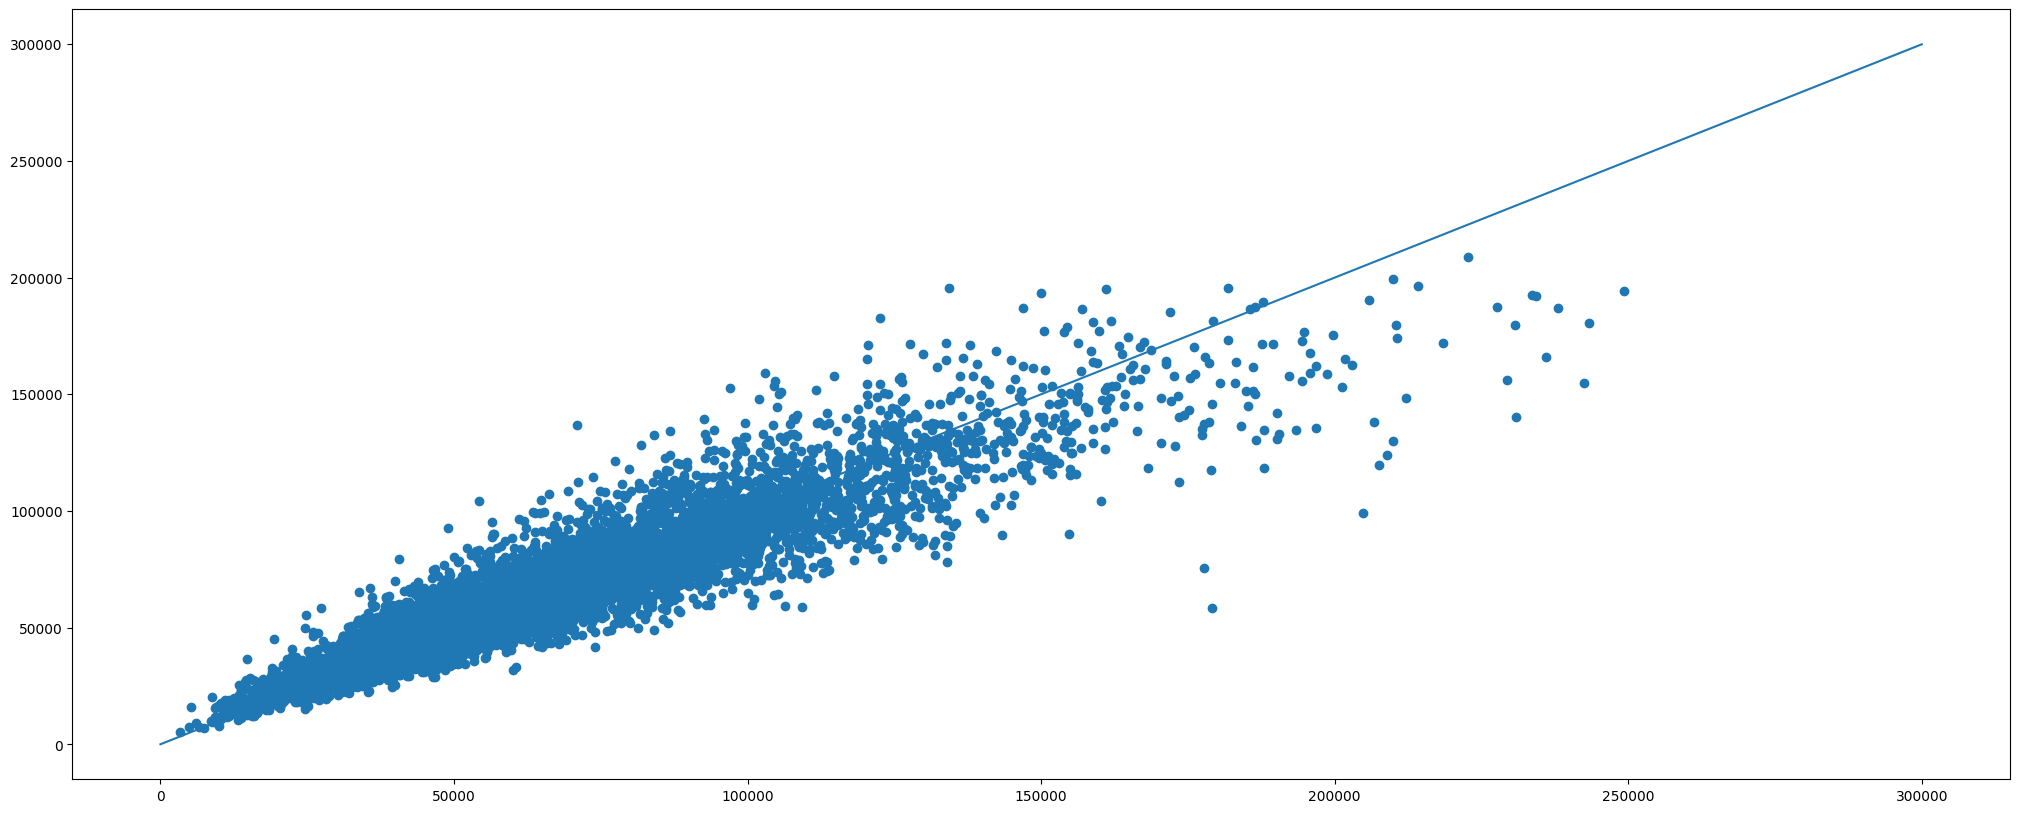

In [41]:
import matplotlib.pyplot as plt
print(model.score(test, y_test))
predictions = model.predict(test)
plt.figure(figsize=(25,10))
plt.scatter(y_test.tolist(), predictions)
plt.plot(range(300_000), range(300_000))

plt.show()

In [42]:
import sklearn.metrics as m
def output_results():
    print('rmse', m.root_mean_squared_error(y_test, predictions))
    print('mae', m.mean_absolute_error(y_test, predictions))
    print('r2', m.r2_score(y_test, predictions))
    print('mae', m.median_absolute_error(y_test, predictions))
    
output_results()

rmse 11024.12685978127
mae 7495.6361188150795
r2 0.8675132151026033
mae 5145.315573050506


In [ ]:
rmse 11391.910691768146
mae 7695.909934462322
r2 0.8610699624089116
mae 5243.0546875

rmse 11024.427426877613
mae 7473.284436060622
r2 0.867505990637283
mae 5157.443216728963

rmse 17208.21048964064
mae 13120.623516920656
r2 0.6771836104581264
mae 10301.412583562487